# 零售資料集 (grocery datasets)

In [1]:
library(Matrix)
library(arules) # 關聯規則
library(arulesViz) # 可視化


載入套件：'arules'


下列物件被遮斷自 'package:base':

    abbreviate, write




In [2]:
# 讀入資料集
data("Groceries")
summary(Groceries)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
       labels  level2           level1
1 frankfurter sausage meat and sausage
2     sausage sausage meat and sausage
3  live

In [3]:
# 觀看數據集資料的種類
inspect(Groceries[1:8])

    items                     
[1] {citrus fruit,            
     semi-finished bread,     
     margarine,               
     ready soups}             
[2] {tropical fruit,          
     yogurt,                  
     coffee}                  
[3] {whole milk}              
[4] {pip fruit,               
     yogurt,                  
     cream cheese ,           
     meat spreads}            
[5] {other vegetables,        
     whole milk,              
     condensed milk,          
     long life bakery product}
[6] {whole milk,              
     butter,                  
     yogurt,                  
     rice,                    
     abrasive cleaner}        
[7] {rolls/buns}              
[8] {other vegetables,        
     UHT-milk,                
     rolls/buns,              
     bottled beer,            
     liquor (appetizer)}      


In [4]:
rules0 <- apriori(Groceries, parameter=list(support=.005, confidence=0.6))
inspect(rules0)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.005      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 49 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [120 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.01s].
writing ... [22 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                        rhs                    support confidence    coverage     lift count
[1]  {root vegetables,                                                                              
      onions}                => {other vegetables} 0.005693950  0.6021505 0.00945602

In [5]:
# 排序 亦可設定 confidence, lift, ...
rule.sup <- sort(rules0, by="support")
inspect(rule.sup)

     lhs                        rhs                    support confidence    coverage     lift count
[1]  {butter,                                                                                       
      yogurt}                => {whole milk}       0.009354347  0.6388889 0.014641586 2.500387    92
[2]  {root vegetables,                                                                              
      butter}                => {whole milk}       0.008235892  0.6377953 0.012913066 2.496107    81
[3]  {root vegetables,                                                                              
      other vegetables,                                                                             
      yogurt}                => {whole milk}       0.007829181  0.6062992 0.012913066 2.372842    77
[4]  {tropical fruit,                                                                               
      other vegetables,                                                                    

In [6]:
rules1 <- apriori(Groceries, parameter=list(supp=.0007, conf=.1), appearance=list (rhs="mustard", default="lhs"))
inspect(rules1)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.1    0.1    1 none FALSE            TRUE       5   7e-04      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 6 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [162 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 done [0.04s].
writing ... [9 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                            rhs            support confidence    coverage      lift count
[1] {ketchup}                   => {mustard} 0.0007117438  0.1666667 0.004270463 13.891243     7
[2] {mayonnaise}                => {mustard} 0.0014234875  0.1555556 0.009150991 12.965160

In [7]:
#Output frequent iemsets
#breadth first searching (交易代碼為key)
items0 <- apriori(Groceries, parameter= list(minlen=2, maxlen=5, supp=0.01, target="frequent itemsets"), control=list(sort=-1)) 
summary(items0)
inspect(items0[1:10])

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
         NA    0.1    1 none FALSE            TRUE       5    0.01      2
 maxlen            target  ext
      5 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE   -1    TRUE

Absolute minimum support count: 98 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [88 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.01s].
sorting transactions ... done [0.00s].
writing ... [245 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].


set of 245 itemsets

most frequent items:
      whole milk other vegetables           yogurt       rolls/buns 
              70               62               38               35 
 root vegetables          (Other) 
              33              284 

element (itemset/transaction) length distribution:sizes
  2   3 
213  32 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   2.000   2.000   2.131   2.000   3.000 

summary of quality measures:
    support            count      
 Min.   :0.01007   Min.   : 99.0  
 1st Qu.:0.01149   1st Qu.:113.0  
 Median :0.01423   Median :140.0  
 Mean   :0.01745   Mean   :171.6  
 3rd Qu.:0.02044   3rd Qu.:201.0  
 Max.   :0.07483   Max.   :736.0  

includes transaction ID lists: FALSE 

mining info:
      data ntransactions support confidence
 Groceries          9835    0.01          1
                                                                                                                                      call
 apriori(data = Groce

     items                          support    count
[1]  {other vegetables, whole milk} 0.07483477 736  
[2]  {whole milk, rolls/buns}       0.05663447 557  
[3]  {whole milk, soda}             0.04006101 394  
[4]  {whole milk, yogurt}           0.05602440 551  
[5]  {whole milk, bottled water}    0.03436706 338  
[6]  {root vegetables, whole milk}  0.04890696 481  
[7]  {tropical fruit, whole milk}   0.04229792 416  
[8]  {whole milk, shopping bags}    0.02450432 241  
[9]  {sausage, whole milk}          0.02989324 294  
[10] {whole milk, pastry}           0.03324860 327  


In [8]:
#depth first searching (商品代碼為key)
items = eclat(Groceries, parameter=list (minlen=2, maxlen=5, supp=0.03, target="frequent itemsets")) 
summary(items)
inspect(items)
rules <- ruleInduction(items, Groceries, conf = .3)
inspect(rules)

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.03      2      5 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 295 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [44 item(s)] done [0.00s].
creating sparse bit matrix ... [44 row(s), 9835 column(s)] done [0.00s].
writing  ... [19 set(s)] done [0.01s].
Creating S4 object  ... done [0.00s].


set of 19 itemsets

most frequent items:
      whole milk other vegetables       rolls/buns           yogurt 
              11                6                5                3 
            soda          (Other) 
               3               10 

element (itemset/transaction) length distribution:sizes
 2 
19 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support            count      
 Min.   :0.03010   Min.   :296.0  
 1st Qu.:0.03299   1st Qu.:324.5  
 Median :0.03833   Median :377.0  
 Mean   :0.04129   Mean   :406.1  
 3rd Qu.:0.04540   3rd Qu.:446.5  
 Max.   :0.07483   Max.   :736.0  

includes transaction ID lists: FALSE 

mining info:
      data ntransactions support
 Groceries          9835    0.03
                                                                                                         call
 eclat(data = Groceries, parameter = list(minlen = 2, maxlen = 5, supp = 0.03, targ

     items                               support    count
[1]  {whole milk, whipped/sour cream}    0.03223183 317  
[2]  {pip fruit, whole milk}             0.03009659 296  
[3]  {whole milk, pastry}                0.03324860 327  
[4]  {citrus fruit, whole milk}          0.03050330 300  
[5]  {sausage, rolls/buns}               0.03060498 301  
[6]  {whole milk, bottled water}         0.03436706 338  
[7]  {tropical fruit, whole milk}        0.04229792 416  
[8]  {tropical fruit, other vegetables}  0.03589222 353  
[9]  {root vegetables, whole milk}       0.04890696 481  
[10] {root vegetables, other vegetables} 0.04738180 466  
[11] {whole milk, soda}                  0.04006101 394  
[12] {other vegetables, soda}            0.03274021 322  
[13] {rolls/buns, soda}                  0.03833249 377  
[14] {whole milk, yogurt}                0.05602440 551  
[15] {other vegetables, yogurt}          0.04341637 427  
[16] {yogurt, rolls/buns}                0.03436706 338  
[17] {whole mi

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.004      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 39 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [126 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [40 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


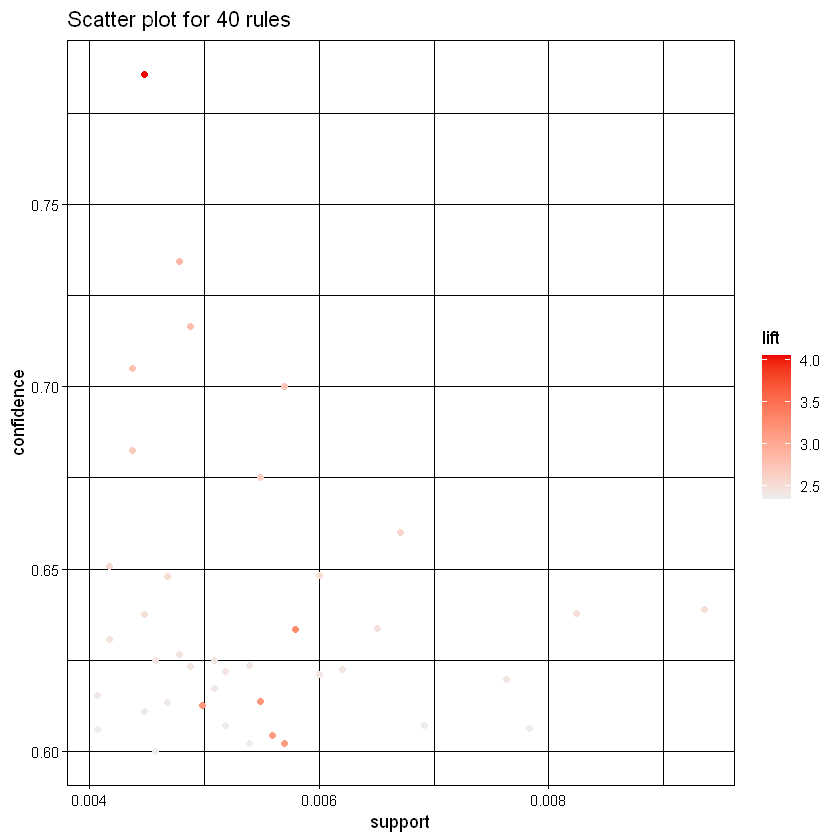

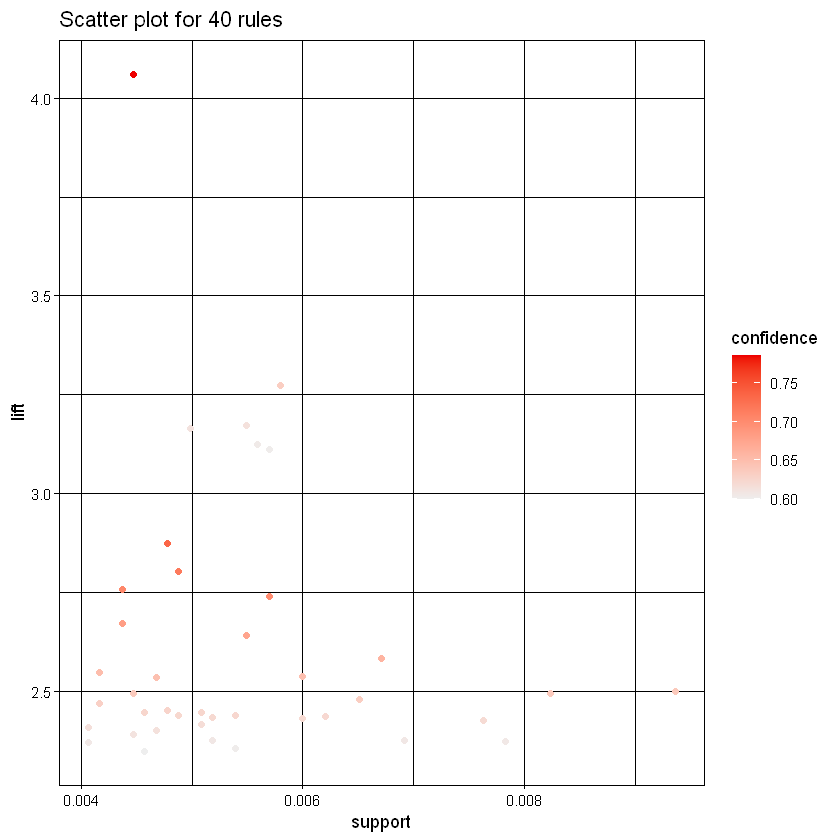

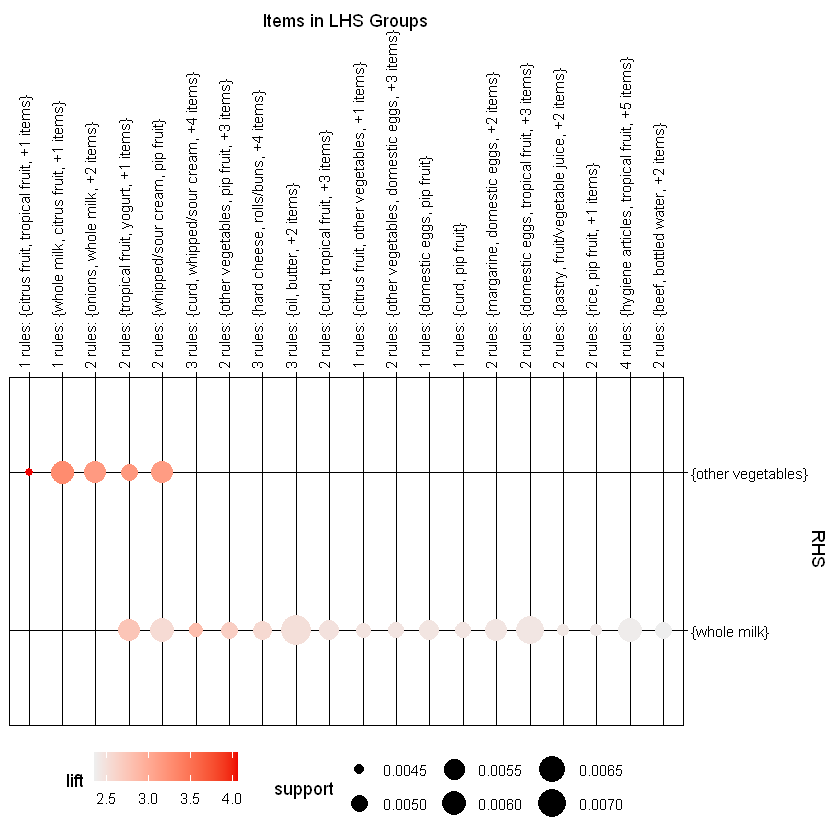

In [9]:
# 可視化Visualization
rules2=apriori(Groceries, parameter=list(support=0.004, confidence=0.6))
plot(rules2)
plot(rules2, measure=c("support", "lift"), shading="confidence")
plot(rules2, method="grouped")